<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Постановка задачи

В нашем распоряжении данные клиентов страховой компании "Хоть потоп".   
Нам необходимо разработать алгоритм преобразования данных, чтобы защитить персональную информацию клиентов компании. Для этого необходимо преобразовать данные таким образом, чтобы качество работы моделей машинного обучения не ухудшалось.

## Загрузка данных

In [82]:
!pip install phik

In [83]:
# загрузим необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import phik
from phik.report import plot_correlation_matrix, correlation_report

In [84]:
# загрузим данные и выведем первые 5 строк на экран, чтобы убедиться в том, что данные считались корректно
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим основные статистические метрики

In [85]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Построим графики, чтобы посмотреть как распределяются данные и есть ли выбросы

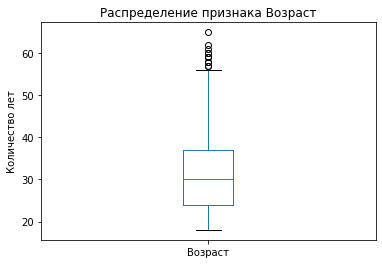

In [86]:
data['Возраст'].plot(kind='box')
plt.title('Распределение признака Возраст')
plt.ylabel('Количество лет')
plt.show()

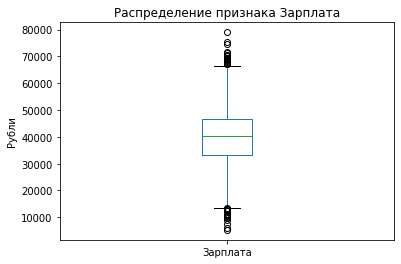

In [87]:
data['Зарплата'].plot(kind='box')
plt.title('Распределение признака Зарплата')
plt.ylabel('Рубли')
plt.show()

Посмотрим какое количество клиентов зарабатывают менее 10 тыс рублей

In [88]:
data[data['Зарплата'] <= 10000]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
437,0,28.0,8900.0,4,0
483,0,29.0,9800.0,2,0
726,1,20.0,5300.0,1,0
2221,0,32.0,10000.0,1,0
4164,1,40.0,6000.0,1,0
4623,0,41.0,7400.0,0,0


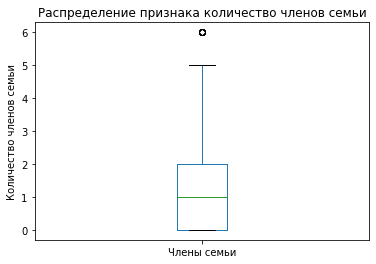

In [89]:
data['Члены семьи'].plot(kind='box')
plt.title('Распределение признака количество членов семьи')
plt.ylabel('Количество членов семьи')
plt.show()

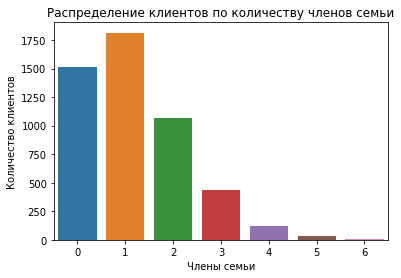

In [90]:
sns.barplot(data = data.pivot_table(index='Члены семьи', values='Возраст', aggfunc='count').reset_index(), x='Члены семьи', y='Возраст')
plt.title('Распределение клиентов по количеству членов семьи')
plt.ylabel('Количество клиентов')
plt.show()

Проверим наличие корреляции между признаками

In [91]:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


In [92]:
%%time
phik_overview = data.phik_matrix()

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']
CPU times: user 86.9 ms, sys: 0 ns, total: 86.9 ms
Wall time: 88.8 ms


In [93]:
corr = pd.DataFrame(phik_overview.values, index= phik_overview.index,  columns = phik_overview.columns)
corr

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000000,0.000000,0.0,0.032181
Возраст,0.000000,1.000000,0.071073,0.0,0.884865
Зарплата,0.000000,0.071073,1.000000,0.0,0.000000
Члены семьи,0.000000,0.000000,0.000000,1.0,0.000000
Страховые выплаты,0.032181,0.884865,0.000000,0.0,1.000000


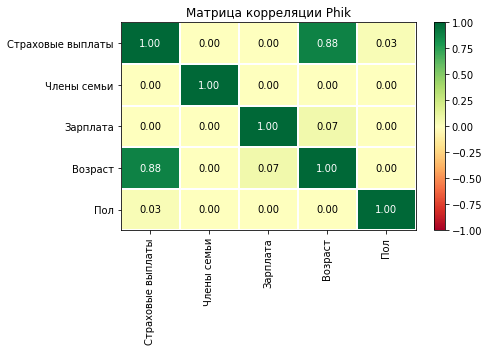

In [94]:
plot_correlation_matrix(corr.values, corr.columns.values, corr.columns.values)
plt.title('Матрица корреляции Phik')
plt.show()

**Вывод:**  
При анализе матрицы корреляции Phik выявили, что признак **Возраст** имеет сильную прямую корреляцию с целелым признаком

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:**  
Изначальные формулы:
$$a = X*w$$
$$w = (X^T X)^{-1} X^T y$$

Умножим
признаки **X** на обратимую матрицу **P**:  
$$a = X * P * w$$
$$w = ((X*P)^T X*P)^{-1} (X*P)^T y$$

Этап 1: Рассчитаем $w$. Расскроем скобки:
$$w = (( P^T * X^T * X * P)^{-1} *P^T * X^T * y$$

Этап 2: Т.к. матрица обратима, т.е. имеет обратную матрицу значит к ней верно выражение $(AB)^{-1} = B^{-1} A^{-1}$  
Вынесем за скобки $P$, по правилам сочетательного свойства: $(ABC)^{-1} = (C)^{-1} (AB)^{-1}$ , получим:

$$w = P^{-1} * (P^T * X^T * X)^{-1} *P^T *X^T * y$$

Этап 3: Вынесем за скобки $P^T$
$$w = P^{-1} * (X^T * X)^{-1} * (P^T)^{-1} *P^T *X^T * y$$

Этап 4: Произведем преобразование:  
Произведение $(P^T)^{-1}$ на $P^T$ даст единичную матрицу

Получим:
$$w = P^{-1} * (X^T * X)^{-1} * X^T * y$$

Этап 4: Подставим полученную $w$ в формулу
$$
a = X*P*w
$$
Получаем: 
$$ a = X * P  * P^{-1} * (X^T * X)^{-1} *X^T * y$$

Этап 4: Финальное преобразование
$$ P *  P^{-1} = E$$
$$ a = X * (X^T X)^{-1} X^T y$$
т.е. 
$$ a = Xw$$

**Вывод:**  
Отсюда видим, что при перемножении признаков на обратимую матрицу не изменится качество работы модели линейной регрессии

## Алгоритм преобразования

**Алгоритм**
1. Создадим случайную обратимую матрицу P размером 5х5.    
2. ПРоверим, что матрица орбатима: либо определитель матрицы (детерминант) не равен 0, либо должно выполняться условие:
$$ P * P^{-1} = E$$
3. Умножим матрицу целевых признаков на матрицу P
$$ X * P$$
4. Произведем обучение модели на преобразованных признаках.
5. Сравним метрики R2 на исходных данных и признаках, чтобы убедиться в сохранении качества работы модели.

**Обоснование**

Из доказательства в блоке 2 знаем, что если умножить признаки на обратимую матрицу, то качество работы линейной модели на преобразованных признаках не изменится

## Проверка алгоритма

Разобьем данные на признаки и целевой признак **Страховые выплаты**

In [95]:
features = data.drop('Страховые выплаты', axis=1)
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [96]:
target = data['Страховые выплаты']
target

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Страховые выплаты, Length: 5000, dtype: int64

Добавим в признаци столбец, заполненный единицами:

In [97]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
X

array([[1.00e+00, 1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [98]:
y = target

Создадим случайную матрицу размером 5х5, т.к. у нас 4 признака и нулевой столбец заполнен единицами

In [99]:
P = np.random.randint(1,25, (5,5))
P

array([[19, 17, 20,  9, 24],
       [ 8, 12,  2, 16, 11],
       [ 7, 23,  2,  5, 24],
       [ 8, 13, 13,  3, 13],
       [23, 10, 20, 15,  8]])

проверим, что матрица **P** обратима, найдем определитель матрицы (детерминант):

In [100]:
np.linalg.det(P)

-274850.0000000002

Т.к. определитель матрицы не равен нулю можно сделать вывод, что матрица P обратима

Умножим полученную матрицу признаков на обратимую матрицу P.

In [101]:
XP = X @ P
XP

array([[397137., 645782., 644924., 149045., 645827.],
       [304364., 495085., 494132., 114254., 495136.],
       [168222., 273684., 273078.,  63154., 273720.],
       ...,
       [271405., 441197., 440800., 101839., 441220.],
       [261850., 425665., 425226.,  98280., 425687.],
       [325046., 528483., 527898., 121980., 528515.]])

In [102]:
model = LinearRegression()

Обучим модель на исходных признаках

In [103]:
model.fit(X, y)

LinearRegression()

In [104]:
pred_x = model.predict(X)

Обучим модель на преобразованных данных

In [105]:
model.fit(XP, y)

LinearRegression()

In [106]:
pred_xp = model.predict(XP)

Проверим изменилось ли у нас качество работы модели применив метрику R2 на данных до преобразования и после:

In [107]:
print(f'метрика r2_score для признаков:\n'
      f' - до преобразования равна {"{:,.5f}".format(r2_score(y, pred_x))}\n'
      f' - после преобразования {"{:,.5f}".format(r2_score(y, pred_xp))}')

метрика r2_score для признаков:
 - до преобразования равна 0.42495
 - после преобразования 0.42495


**Вывод:**  
Таким образом можно сделать вывод, что при перемножении признаков на обратимую матрицу результат работы модели линейной регрессии не изменится, что доказывается при расчете метрики R2.

## Вывод

В нашем распоряжении были данные клиентов страховой компании "Хоть потоп".  
Было необходимо разработать алгоритм преобразования данных, чтобы защитить персональную информацию клиентов компании.  

В ходе выполнения проекта первоначально загрузили и изучили данные. 
При проверке данных на наличие корреляции не было выяслено явно коррелирующих признаков.

Далее доказали, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

В результате чего для защиты персональной информации было принято создать случайную обратимую матрицу и обучить модель на первоначальных данных и преобразованных.

Для оценки работы модели использовали метрику R2, в результате чего получили одинаковые значения метрики на первоначальных  и преобразованных данных.  

Таким образом мы выполнили задачу по защите персональных данных клиентов и доказали, что качество предсказаний не ухудшится.